## Context
Cars4U is a budding tech start-up that aims to find footholes in the Used car market as pre-owned car market has continued to grow over the past years (specifically between 2018-19). Unlike New Cars where pricingh and supply are failrly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts, used cars have huge uncertainty in both pricing and supply. Therefore, it is very important for Cars4U as a start-up to be able to determine what its future supply and pricing will be like in order to manage its future growth and keep a foothole in ever growing Used car market. 

## Objective
Analyze the data and come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. 

## Key Questions
1) What will be the market price in order to plan target price to not sell below market value?

 # **Data PreProcessing & Sanity Checking**
  ____________________

`@author mirali - Created on Friday Feb 3 - Start your work from the next line`

<h3 style="color:Brown">Loading and Exploring Data</h3>

In [118]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
# To Suppress warning such as future warnings
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
# For reading and manipulating data
import pandas as pd
import numpy as np

# Libraries used for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Command to tell Python to actually display the graphs
%matplotlib inline
# Remove the limit from the number of displayed columns and rows so i can see the entire df when printing
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Libraries used in Data Split (to test and train)
from sklearn.model_selection import train_test_split

# Libraries used for Linear Regression Model Building
from sklearn.linear_model import LinearRegression

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [119]:
# Importing data into data Variable which is our original Data
data = pd.read_csv(
    "https://raw.githubusercontent.com/miricoder/projects/main/Supervised_Learning_Regression/used_cars_data.csv"
)
# Creating Copy of The original Data
df = data.copy()

<IPython.core.display.Javascript object>

In [120]:
# Display column and row values using pyton 3's f-string
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Looking at the 10 random sample rows done using np.random
# Because looking at random values will give you better understaning than head or tail values
np.random.seed(1)
df.sample(10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


<IPython.core.display.Javascript object>

- After carefully analyzing, column name: `S.No.` is the only column that needs to be dropped reason being:
  * Pandas already provides column id which matches that of S.No and renders S.No's usage pointless 
- `Mileage,Engine,Power` columns needs to be turned into numerics
- Year columns seems ok so far
- Categorical Values like below needs to be applied one-hot encoding closer to the end of our analysis right before model building 
     `Fuel_Type,Transmission,Owner_Type`

**Basic EDA-Statistical Summary before going any further to see how our data is looking**

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


<IPython.core.display.Javascript object>

- Count of Price is less than other columns, this could be due to missing values, we will see more as move forward. 

**Dropping the S.No Column**

In [122]:
df.drop(["S.No."], axis=1, inplace=True)
# Validating that S.No. column is removed by checking  df.columns
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

<IPython.core.display.Javascript object>

<h5 style="color:Brown">Quick Sanity Check</h5>

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

- Name column is the first and S.No. column is now gone, our data is down total of 13 columns
- Mileage, Engine, Power, Seats, New_Price and Price all have missing values in them

<h3 style="color:Brown">Processing Data - Before Performing Statisical Analysis</h3>


**Converting `Mileage` column to numeric**

In [124]:
# Looping through to see how many columns have "km/kg" or "kmpl" endings
mileage_endings = ("km/kg", " km/kg", "kmpl")
mileage_cols = []
for colname in df.columns[
    df.dtypes == "object"
]:  # only need to consider string columns
    if (
        df[colname].str.endswith(mileage_endings).any()
    ):  # using `.str` so I can use an element-wise string method
        mileage_cols.append(colname)
print(mileage_cols)

['Mileage']


<IPython.core.display.Javascript object>

In [125]:
def mileage_to_num(mileage_val):
    """
    This function takes in a string representing in Mileage in km/kg & kmpl
    and converts it to a number. For Example, 26.6 km/kg to 26.6
    or 19.67 kmpl to 19.67
    """
    if isinstance(mileage_val, str):  # checks if `mileage_val` is a string
        return float(mileage_val.replace("km/kg", "").replace("kmpl", ""))
    else:
        return np.nan


for colname in mileage_cols:
    df[colname] = df[colname].apply(mileage_to_num)
# Quick Sanity Check
df[mileage_cols].head()

,Mileage
0,26.60
1,19.67
2,18.20
3,20.77
4,15.20


<IPython.core.display.Javascript object>

**Converting `Engine` column to numeric**

In [126]:
# Looping through to see how many columns have "bhp" endings
engine_endings = "CC"
engine_cols = []
for colname in df.columns[
    df.dtypes == "object"
]:  # only need to consider string columns
    if (
        df[colname].str.endswith(engine_endings).any()
    ):  # using `.str` so I can use an element-wise string method
        engine_cols.append(colname)
print(engine_cols)

['Engine']


<IPython.core.display.Javascript object>

In [127]:
def engine_to_num(engine_val):
    """
    This function takes in a string representing in Mileage in CC
    and converts it to a number.
    """
    if isinstance(engine_val, str):  # checks if `mileage_val` is a string
        return float(engine_val.replace("CC", ""))
    else:
        return np.nan


for colname in engine_cols:
    df[colname] = df[colname].apply(engine_to_num)
# Quick Sanity Check
df[engine_cols].head()

,Engine
0,998.0
1,1582.0
2,1199.0
3,1248.0
4,1968.0


<IPython.core.display.Javascript object>

**Converting `Power` column to numeric**

In [128]:
# Looping through to see how many columns have "CC" endings
power_endings = "bhp"
power_cols = []
for colname in df.columns[
    df.dtypes == "object"
]:  # only need to consider string columns
    if (
        df[colname].str.endswith(power_endings).any()
    ):  # using `.str` so I can use an element-wise string method
        power_cols.append(colname)
print(power_cols)

['Power']


<IPython.core.display.Javascript object>

In [129]:
def power_to_num(power_val):
    """
    This function takes in a string representing in Mileage in bhp
    and converts it to a number.
    """
    if isinstance(power_val, str):  # checks if `mileage_val` is a string
        return float(power_val.replace("bhp", ""))
    else:
        return np.nan


for colname in power_cols:
    df[colname] = df[colname].apply(power_to_num)
# Quick Sanity Check
df[power_cols].head()

,Power
0,58.16
1,126.20
2,88.70
3,88.76
4,140.80


<IPython.core.display.Javascript object>

In [130]:
# Printing the random sample from dataset to make sure above numeric conversions has taken affect
print(
    f"There are {df.shape[0]} rows and {df.shape[1]} columns."
)  # Additionally printing the shape of data
# Looking at the 10 random sample rows done using np.random
# Because looking at random values will give you better understaning than head or tail values
np.random.seed(1)
df.sample(10)

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.00,1497.0,121.36,5.0,9.47,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.50,1197.0,81.80,5.0,5.44,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.10,2499.0,141.00,7.0,35.29,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.00,2143.0,201.10,5.0,86.97,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.90,1197.0,82.00,5.0,8.23,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36,2755.0,171.50,7.0,28.05,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.00,2143.0,201.10,5.0,86.97,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68,1968.0,174.33,5.0,67.10,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.50,1197.0,80.00,5.0,10.25,2.50
5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.50,1199.0,88.70,5.0,9.36,8.20


<IPython.core.display.Javascript object>

- Data set is down to 13 columns from 14 and Mileage, Power, Enginer columns are now numeric

**Missing Value Treatment**

<h5 style="color:Brown">Quick Sanity Check</h5>

In [131]:
# Which columns has the most missing values**
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

<IPython.core.display.Javascript object>

- `Price` column has the most values in it and since Price and its a problem since this is the column we are trying to predict
- `Power, Seats, Engine` also has missing values needs to be looked at
- `Mileage` has the least missing values, still needs to be looked at and treated 

*Understading the pattern before imputing the values*

In [132]:
# counting the number of missing values per row
df.isnull().sum(axis=1).value_counts()

0    5872
1    1308
3      36
2      27
4      10
dtype: int64

<IPython.core.display.Javascript object>

- 5872 have `0` missing values, 1308 has `1` missing values, 34 has `3` missing values, 27 has `2` missing values & 10 has `4` missing values in them

In [133]:
# Checking the rows with 1 missing values
num_missing = df.isnull().sum(axis=1)
df[num_missing == 1].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7064,Honda Civic 2006-2010 1.8 (E) MT,Hyderabad,2007,109000,Petrol,Manual,Second,13.50,1799.0,130.00,5.0,13.580,NaN
6186,Mercedes-Benz S Class 2005 2013 S 350 L,Mumbai,2008,65000,Petrol,Automatic,Third,10.13,3498.0,364.90,5.0,49.490,NaN
6391,Hyundai i10 Sportz 1.2,Pune,2008,84500,Petrol,Manual,First,20.36,1197.0,78.90,5.0,10.250,NaN
6940,Ford Ecosport 1.5 DV5 MT Titanium Optional,Kochi,2015,63402,Diesel,Manual,First,22.70,1498.0,89.84,5.0,11.685,NaN
7103,Honda Civic 2006-2010 1.8 MT Sport,Pune,2008,110000,Petrol,Manual,Second,13.50,1799.0,130.00,5.0,13.580,NaN


<IPython.core.display.Javascript object>

- Row 1319 shows that where `Power` is missing `Price` is not, `10` samples also shows the same
- Further more we don't see any rows that comes before price causes price to have a missing value

In [134]:
# Checking the rows with 3 missing values
num_missing = df.isnull().sum(axis=1)
df[num_missing == 3].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.88,4.70
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN,67.87,17.89
5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.88,3.65
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00,NaN,NaN,NaN,33.51,11.99
2780,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.00,NaN,NaN,NaN,4.55,1.60


<IPython.core.display.Javascript object>

- Where `Engine` is missing, so does the `Power` & `Seats` rows

In [135]:
# Checking the rows with 2 missing values
num_missing = df.isnull().sum(axis=1)
df[num_missing == 2].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6386,Nissan Teana 230jM,Coimbatore,2009,67038,Petrol,Automatic,First,9.1,2349.0,NaN,5.0,11.33,NaN
6093,Hyundai Santro Xing XL,Bangalore,2007,47000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,4.55,NaN
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,4.55,NaN
6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,NaN
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,11.30,NaN


<IPython.core.display.Javascript object>

- Not seeing any row missing causing a miss in `Power` but it does however have an affect on price missing like we saw in 1308 rows missing single values

In [136]:
# Checking the rows with 4 missing values
num_missing = df.isnull().sum(axis=1)
df[num_missing == 4].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6541,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,NaN,NaN,NaN,8.525,NaN
6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,NaN,NaN,NaN,8.525,NaN
6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,NaN,NaN,NaN,25.830,NaN
6643,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.870,NaN
6880,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.870,NaN


<IPython.core.display.Javascript object>

- Where `Engine` is missing so does `Power`,`Seats` and `Price`

There is a pattern which is analyzed programatically as below, and also all missing rows are numerical

In [137]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, NAs are found in:
Mileage       2
Power       103
Seats         2
Price      1201
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Power    26
Seats     5
Price    23
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine    10
Power     10
Seats     10
Price     10
dtype: int64





<IPython.core.display.Javascript object>

- As we can columns are either missing together or missing in seperate quantities and orders. Price is definetly affected 
- We will not drop these columns as we need them for our model, specially price. We will impute them with thei mean values 

*Imputing the numerical columns values with their mean values, keeping in mind that we will also need to do an Outlier treatment as means are prone to be affected by outliers*

In [138]:
# Using `fillna` with a numeric volumn
# We need to make sure of the column sequence to stay as per data column sequence, otherwise some rows
# won't be impupted into their mean value
numeric_cols = ["Mileage", "Engine", "Power", "Seats", "Price"]
for i in numeric_cols:
    print(df[i].isnull().sum())
    df[i].fillna(df[i].mean(), inplace=True)  # mean imputation
    df[i].isnull().sum()

2
46
175
53
1234


<IPython.core.display.Javascript object>

In [139]:
# Which columns has the most missing values**
df.isnull().sum().sort_values(ascending=False)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

- Now `Engine`, `Power`, `Seats`,`Price` are containing 0 missing values

**Basic EDA-Statistical Summary before going any further to see how our data is looking**

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.000000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.000000,6500000.00
Mileage,7253.0,18.141580,4.561567,0.00,15.17,18.16,21.100000,33.54
Engine,7253.0,1616.573470,593.394164,72.00,1198.00,1493.00,1968.000000,5998.00
Power,7253.0,112.765214,52.844178,34.20,77.00,98.60,138.030000,616.00
Seats,7253.0,5.279722,0.808688,0.00,5.00,5.00,5.000000,10.00
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.690000,375.00
Price,7253.0,9.479468,10.191695,0.44,3.85,6.75,9.479468,160.00


<IPython.core.display.Javascript object>

- `Price` : Columns is now at 7253 Count as oppose to earlier where it was at 6019
- `Seats`: Column is at 7253 Count as oppose to earlier where it was at 7200
- We also now have more numeric data shown that before since we converted Mileade, Engine, Power to numeric values
- `Mileage`: min is 0.00 indicating to a new Car, where max mileage of pre-owned vehicle is 34k miles
- `Engine`: Normally, a car's cc can range between 800 cc to 6000 cc. As mentioned earlier, the lower the cc of the car, the better the mileage obtained. Hence, cars with up to 1000 cc give the best mileage, while cars with the cc ranging from 1000 to 1800 are also quite economical.Our max cc value doesn't seem overly exagurated therefore missing values treatment does not seem to have introduced an outlier
- `Power`: Generally, anything more than 200bhp can reasonably be considered a high-performance car, in our case we do see some luxury vehicles with max 616 bhp, this will be further analyed in outlier treatment
- `Seats`: While most car brands whether ecnomical or luxury can have 5 seats, however 10 seats is usually for `2022 Ford Transit Passenger Van` type vehicles, there are seems to be some outliers here
- `Price`: Less than 75% of vehicles are resonably priced at less than 10K, however there are few outliers that has 160K, which are probably correl

In [141]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")  # just for more space between

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda Amaze S i-Dtech         32
Hyundai Grand i10 Sportz      32
Honda City 1.5 V MT           32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.



Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64





<IPython.core.display.Javascript object>

- Manual vehicles (5204) has an advantage over Automatic vehicles (2049)

In [142]:
# Originally saw 175 NaN values in power after checking with below code i was able to verify which they were.
# After scrolling removing kmpl endings with spaced in the front from Mileage column the issue went away.
# Keeping those code block here to remind myself that, i should doublcheck to make sure the values i am
# dropping for conversion are actually reflected or not.
double_checking_columns_for_missing = ["Mileage", "Engine", "Power", "Price"]
"""
Mileage, Engine,Power : Previously converted to numeric
Price: Just double checking to make sure
"""
for c in double_checking_columns_for_missing:
    nan_value = df[c].isnull().values.sum()
    print(f"Remaining NaN Values for {c} {nan_value}")


Remaining NaN Values for Mileage 0
Remaining NaN Values for Engine 0
Remaining NaN Values for Power 0
Remaining NaN Values for Price 0


<IPython.core.display.Javascript object>

- Initial Observation after running the above code was that, there were 175 Values in Power colums were still NaN / or missing
- After running --> df[df["Power"].isnull()] and analyzing the results i realized that there were some kmpl values in Mileage section with spaces infornt of them. So after removing the spaces i re ran the code from Top to this point and reconfirmed with above code that not only converted Numeric columns(Mileage, Engine, Power) are still numeric and also Price column also has not missing columns

 # **Sanity Check** - There's no need for Seperate Sanity Check since this is done while preparing the Data anyways. Confirm with the instructor
 _______________________________________________________

`@author mirali - Created on Friday Feb 3 - Start your work from the next line`

# **EDA - Exploratory Data Analysis on PreProcessed Data**
_______________________________________________________
1) Independent Variable must always be Normally distributed in order to generalize effectively and not be biased 
   - If not normally distirbuted we need to perform transformation on data

`@author mirali - Created on Friday Feb 3 - Start your work from the next line`

<h3 style="color:Brown">Bivariate Analysis</h3>

Reusable Method for Histplot and boxplot

In [143]:
def hist_box(data, feature, figsize=(10, 5), kde=True, bins=None):
    """
    Boxplot and Histogram combined within the same graph page
    in order to make comparison and analysis more efficient

    data: dataframe
    feature: dataframe column
    figsize: size of the figures (default (10,5))
    kde: whether to show the density curve (values set by user during usage - Boolean)
    bins: number of bins for histogram (default None)"""
    # f2 holds are graph withax_box2 and ax_hist2 params
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

Reusable Method for creating Barplots

In [144]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

Reusable Method for Calculating A five-number summary values - printing most important ones

In [146]:
def five_number_summary(column_name):
    """
    column_name: name of the column that should be searched and stats described for
    """
    # To get the 25%quantile
    _25p = df[column_name].quantile(0.25)
    # To get the median
    _median = df[column_name].median()
    # To get the mean
    _mean = df[column_name].mean()
    # To get the 75%Quantile
    _75p = df[column_name].quantile(0.75)
    # To get the Standard Deviation
    std = df[column_name].std()
    print(
        "25%",
        _25p,
        "\n" "Mean-Green",
        _mean,
        "\n" "Median-Boxplot",
        _median,
        "\n" "75%",
        _75p,
        "\n",
        "StandarD",
        std,
        "\n",
    )

<IPython.core.display.Javascript object>

`Analyzinig Numeric Columns: Year / Manufacturing year of the car`

25% 2011.0 
Mean-Green 2013.3653660554253 
Median-Boxplot 2014.0 
75% 2016.0 
 StandarD 3.2544208117253053 



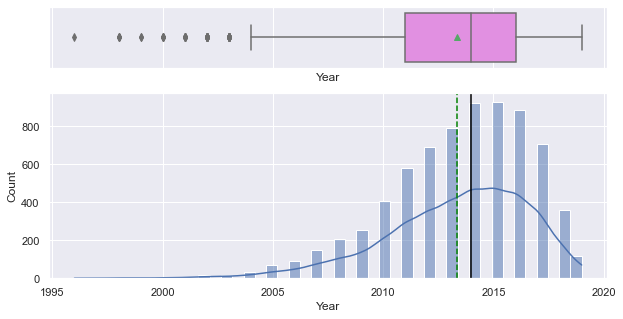

<IPython.core.display.Javascript object>

In [147]:
five_number_summary("Year")
hist_box(df, "Year")

- Most the Manufacturing year of the car falls between 2011 and 2016
- Data has left skewedness, which may require Log Transformation....

     "The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. "

`Analyzinig Numeric Columns: Kilometers_Driven / The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)`

25% 34000.0 
Mean-Green 58699.063146284294 
Median-Boxplot 53416.0 
75% 73000.0 
 StandarD 84427.72058265151 



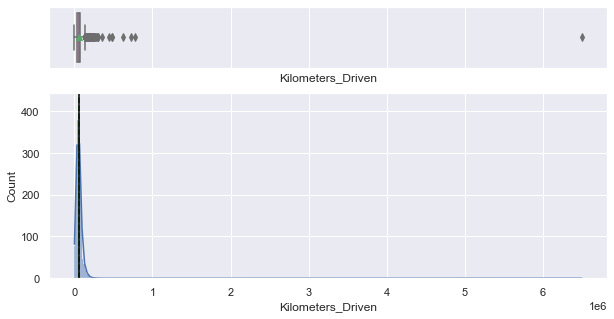

<IPython.core.display.Javascript object>

In [148]:
five_number_summary("Kilometers_Driven")
hist_box(df, "Kilometers_Driven")

- There is huge variance in Standard Deviation `84427.72058265151`
- Data is heavily skewed on the right
   - Log Transformation might also be needed here
- Pre-Owned vehicles have between 34000 to 75000 KMs on them

`Analyzinig Numeric Columns: Mileage / The standard mileage offered by the car company in kmpl or km/kg`

 
<h5 style="color:Dark">Factors to keep in mind as part of the research</h5>

*************************************************
- According to https://www.iea.org/articles/fuel-economy-in-india  "Anything that is listed as less than 6-litres/100km or more than 16.5km/1-litre is considered to be pretty good. The first (and most common) reference is litres per 100km (litres/100km). This is how many litres of fuel the car needs in order to travel 100km."
- Keeping in mind that diesels can achieve 25-30% better mileage than a gas engine due to the higher efficiency of diesel fuel and it's not uncommon for a diesel-powered car to get 50 mpg or higher.
also, while diesel fuel and diesel vehicles often cost more, diesel vehicles usually hold their resale value better and get better mileage than gas vehicles.
- Keeping in mind that diesels can achieve 25-30% better mileage than a gas engine due to the higher efficiency of diesel fuel and it's not uncommon for a diesel-powered car to get 50 mpg or higher.
also, while diesel fuel and diesel vehicles often cost more, diesel vehicles usually hold their resale value better and get better mileage than gas vehicles.

     Best Fuel-Efficient Passenger Cars
      * Two-Seater: Smart EQ Fortwo (coupe) gets 108 mpg
      * Minicompact: Fiat 500e gets 112 mpg
      * Subcompact: BMW i3 gets 113 mpg
      * Compact: Volkswagen e-Golf gets 119 mpg
      * Mid-Size: Hyundai Ioniq Electric gets 136 mpg
      * Large: Tesla Model S Long Range gets 111 mpg
      * Small Station Wagon: Chevrolet Bolt EV gets 119 mpg


25% 15.17 
Mean-Green 18.14158047165908 
Median-Boxplot 18.16 
75% 21.1 
 StandarD 4.561567463392662 



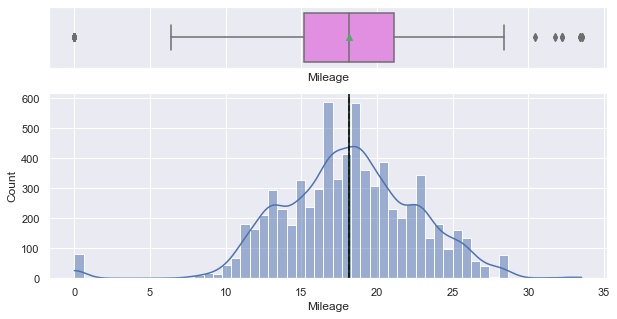

<IPython.core.display.Javascript object>

In [149]:
five_number_summary("Mileage")
hist_box(df, "Mileage")

- Given that "16.5 Kilometers per liter = 16.5 x 2.352146 = 38.81 Miles per gallon."  is considered to be pretty good, and in our data we can see that average offered kmpl is at 18.16
- Also keeping in mind that Diesel cars are more expensive due to the fact that they provide better kmpl, we will further analyse to see how Diesel and Gasoline differentiate in price per Mileage offered

`Analyzinig Numeric Columns: Engine / The displacement volume of the engine in CC` 

Cubic Centimeter

- Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc)
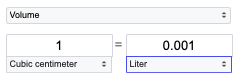





25% 1198.0 
Mean-Green 1616.5734702372692 
Median-Boxplot 1493.0 
75% 1968.0 
 StandarD 593.3941635384517 



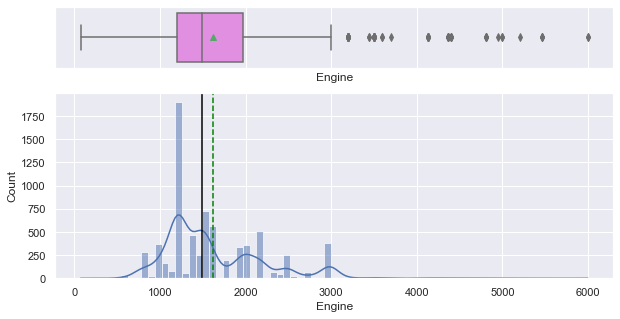

<IPython.core.display.Javascript object>

In [150]:
five_number_summary("Engine")
hist_box(df, "Engine")

- There're few outliers in the Engine Data, as data is skewed right 
- Standard deviation is also high
-  Engine Sizes varies between 1198 and 1968 with High Standard Deviation 
- Given, The fact that the lower the cc of the car, the better the mileage obtained, cars with up to 1000 cc give the best mileage. In our case 25% of the Cars are below 1198 CC.


`Analyzinig Numeric Columns: Power`

This column was converted to numerical by removing bhp value from it: Brake Horsepower (bhp) is often used as a more realistic measurement of power. 



While hp does not take into account frictional losses in power from an engine, brake horsepower does — meaning hp is always higher than bhp. The difference between the two is small on a 1:1 basis. 1hp is the equivalent to just under 0.99bhp, though scaled up you'll notice differences

The average for crossovers is 200 hp, midsize autos put out 170 hp, while small SUVs are generally capable of 240 hp

25% 77.0 
Mean-Green 112.7652140435151 
Median-Boxplot 98.6 
75% 138.03 
 StandarD 52.84417784990582 



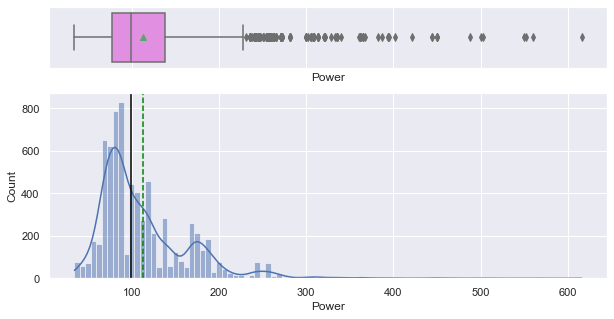

<IPython.core.display.Javascript object>

In [151]:
five_number_summary("Power")
hist_box(df, "Power")

- Given that 250 horsepower in a very small car or about 400 horsepower in an exceptionally large vehicle, 75% of our Power data falls below 138bhp indicating that most of our vehicles are small/sedan type cars
- Given that that an average horse power todat is between 180-200 hp, and luxury car's hp starts at 250 on average, from the mean-bhp is at 112bhp in our data most of the vehicles shiuldd be light vehicles and non luxury vehicles.  
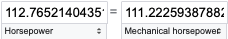

`Analyzinig Numeric Columns: Seats / The number of seats in the car`

25% 5.0 
Mean-Green 5.279722222222222 
Median-Boxplot 5.0 
75% 5.0 
 StandarD 0.8086882943196436 



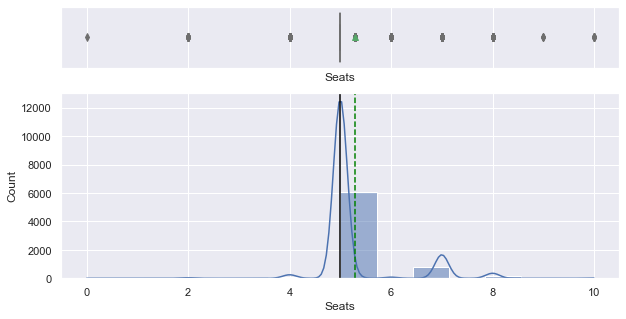

<IPython.core.display.Javascript object>

In [152]:
five_number_summary("Seats")
hist_box(df, "Seats")

- Average seating count for our vehicles is at 5, which is expected and proves that most of the vehicles in our data set are light vehicles (.i.e. Sedans)
- There are some outliers mostly in the right side and data is skewed right as well. 
- We can also see that there're very few vehicles that are not 5 seated, as proven by Mean of 5.27

`Analyzinig Numeric Columns: New_Price/The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)`

25% 7.88 
Mean-Green 21.307321797876742 
Median-Boxplot 11.3 
75% 21.69 
 StandarD 24.25631360470647 



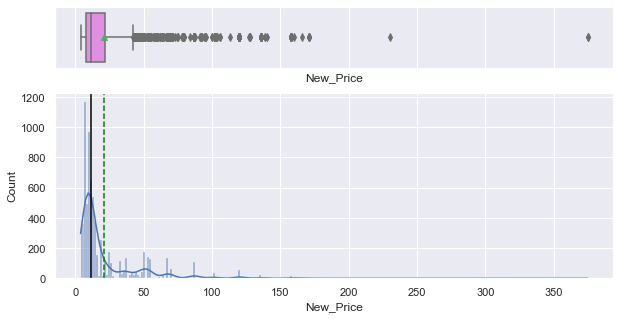

<IPython.core.display.Javascript object>

In [153]:
five_number_summary("New_Price")
hist_box(df, "New_Price")

- Price various between almost 8K and 22K with high Standar deviation 
- 75% of the vehicles are under 22K
- There're a lots of outliers on the right side and data is right skewed

`Analyzinig Numeric Columns: Price/The price of the used car in INR Lakhs`

25% 3.85 
Mean-Green 9.47946835022429 
Median-Boxplot 6.75 
75% 9.47946835022429 
 StandarD 10.191695371060849 



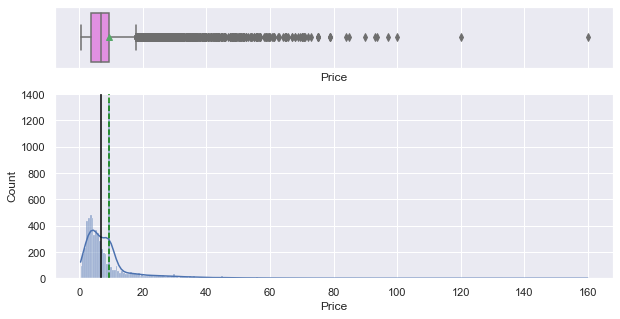

<IPython.core.display.Javascript object>

In [154]:
five_number_summary("Price")
hist_box(df, "Price")

- Median price is at 7k which is just a little under the price tag of less than 25% of the vehicles are found in New_Price Column
- Used Car prices is well under the New_Car Prices as expected
- There're alot of Outliers and data is Skewed to the right

`Analyzinig Numeric Columns: Name/The price of the used car in INR Lakhs`

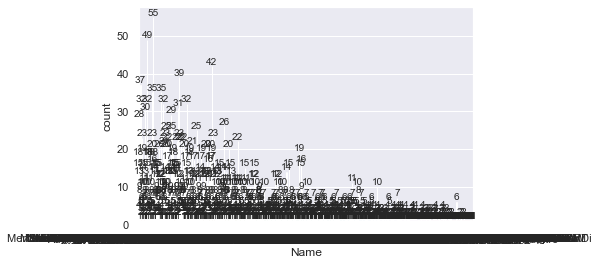

<IPython.core.display.Javascript object>

In [156]:
# labeled_barplot(df, "Name", perc=True)
# ax = sns.countplot(x='User', hue='C', data=df)
# for container in ax.containers:
#     ax.bar_label(container)
ax = sns.countplot(x="Name", data=df)
for container in ax.containers:
    ax.bar_label(container)

`Analyzinig Numeric Columns: Location/Location in which the car is being sold or is available for purchase (cities)`

`Analyzinig Numeric Columns: Fuel_Type/The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)`

`Analyzinig Numeric Columns: Transmission/The type of transmission used by the car (Automatic/Manual)`

`Analyzinig Numeric Columns: Owner_Type/Type of ownership`

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            0 non-null      float64
 8   Engine             0 non-null      float64
 9   Power              0 non-null      float64
 10  Seats              7253 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              7253 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

<h3 style="color:Brown">Univariate Analysis</h3>

<h5 style="background-color:#E3E4FA">Question #1:How does the Kilometers_driven affect price and Mileage</h5>

<h5 style="background-color:#E3E4FA">Question #2:What is the key differences in Mileage and Price between Diesel and Petrol fuelds cars?</h5>

<h5 style="background-color:#E3E4FA">Question #3:Given, the fact that the lower the cc of the car,the better the mileage obtained,cars with up to 1000 cc give the best mileage, what is the most expensive vehicle per mileage and CC</h5>

<h5 style="background-color:#E3E4FA">Question #4:How does the price changes per Engines Size, Power and Mileage</h5>

<h5 style="background-color:#E3E4FA">Question #5: What is the price of vehciles as per Seating provided?</h5>

<h5 style="background-color:#E3E4FA">Question #6: In Which city does NewCars(New_Price) sells the most and old cars (Price) sells the most?</h5>

**** 
<h3 style="color:Brown">One-Hot Encoding categorical columns before Building ML Models</h3>

### <a id='link1'>Summary of EDA</a>

# **Build a linear regression model to predict the prices of used cars**
_______________________________________________________

`@author mirali - Created on Friday Feb 3 - Start your work from the next line`

### <a id='link1'>Conclusions</a>

# **Insights and Recommendations that will help the business**
_______________________________________________________

`@author mirali - Created on Friday Feb 3 - Start your work from the next line`